Klucze dostępne w zbiorze danych:  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibili

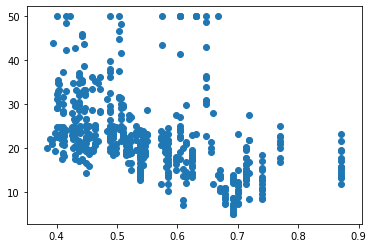

Metryka domyślna:  0.17416162998587448
Metryka r2:  0.17416162998587448
Współczynniki regresji:
 [-30.53780604]


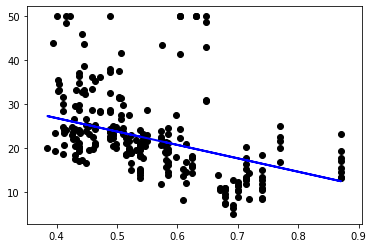

R^2 (coefficient of determination) regression score: [-0.30913397  0.09366647 -0.63345725  0.05210964 -0.74232224]
Explained variance regression score: [ 0.18491784  0.26630758 -0.20562301  0.08171991  0.22516046]
Mean squared error regression loss: [ -45.21119708  -82.50966219 -130.81902305  -83.14121895  -46.32541572]
Mean absolute error regression loss: [-5.92125935 -6.04781492 -8.01542985 -6.77463159 -5.58839054]
MAX Error: [-16.22059084 -30.08107898 -31.60758344 -31.0981337  -15.12078899]


In [1]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań.

from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

print('Klucze dostępne w zbiorze danych: ', boston_nieruchomosci.keys())
print(boston_nieruchomosci.DESCR)

# konwersja na obiekt pandas.DataFrame
boston_df = pd.DataFrame(boston_nieruchomosci['data'], columns=boston_nieruchomosci['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
boston_df['target'] = np.array(list(boston_nieruchomosci['target']))

# wykres
#sns.pairplot(boston_df)
#plt.show()

# wybrana cecha: ilość tlenków azotu (NOX)
nox_ind = boston_nieruchomosci['data'][:, np.newaxis, 4]
plt.scatter(nox_ind, boston_nieruchomosci['target'])
plt.show()

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(nox_ind, boston_nieruchomosci['target'], test_size = 0.5)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

# Użyj walidacji krzyżowej.
cv_score_r2 = cross_val_score(linreg, nox_ind, boston_nieruchomosci.target, cv=5, scoring='r2')
print("R^2 (coefficient of determination) regression score:",cv_score_r2)
cv_score_ev = cross_val_score(linreg, nox_ind, boston_nieruchomosci.target, cv=5, scoring='explained_variance')
print("Explained variance regression score:",cv_score_ev)
cv_score_mse = cross_val_score(linreg, nox_ind, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print("Mean squared error regression loss:",cv_score_mse)
cv_score_mae = cross_val_score(linreg, nox_ind, boston_nieruchomosci.target, cv=5, scoring='neg_mean_absolute_error')
print("Mean absolute error regression loss:",cv_score_mae)
cv_score_max_error = cross_val_score(linreg, nox_ind, boston_nieruchomosci.target, cv=5, scoring='max_error')
print("MAX Error:", cv_score_max_error)

Klucze dostępne w zbiorze danych:  dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered a

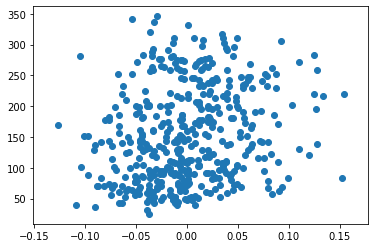

Metryka domyślna:  0.0051628796954075185
Metryka r2:  0.0051628796954075185
Współczynniki regresji:
 [196.34421848]


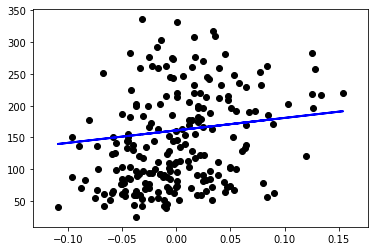

R^2 (coefficient of determination) regression score: [-0.07400753  0.02607371  0.01695226  0.10823275  0.01643085]
Explained variance regression score: [-0.02216761  0.05206964  0.01934736  0.11080537  0.01928032]
Mean squared error regression loss: [-5233.92220256 -6179.01033373 -6152.48742755 -4678.45006557
 -6364.39093367]
Mean absolute error regression loss: [-59.77097878 -65.35167422 -66.15162786 -59.70927095 -69.49186285]
MAX Error: [-205.6518249  -196.75528693 -203.76204264 -180.26456615 -182.88966136]


In [1]:
# Zadanie bonus: zaimportuj dane o cukrzycy przy pomocy funkcji load_diabetes
# Następnie przeanalizuj dane i zaproponuj regresor liniowy. 
# Sprawdź jakość modelu za pomocą walidacji krzyżowej.
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

diabetics = load_diabetes()

print('Klucze dostępne w zbiorze danych: ', diabetics.keys())
print("feature names:",diabetics.feature_names)
print(diabetics.DESCR)


# konwersja na obiekt pandas.DataFrame
diabetics_df = pd.DataFrame(diabetics['data'], columns=diabetics['feature_names'])

# doklejenie informacji o cenie do reszty dataframe
diabetics_df['target'] = np.array(list(diabetics['target']))

# wykres
#sns.pairplot(diabetics_df)
#plt.show()

# wybrana cecha: BMI
bmi_ind = diabetics['data'][:, np.newaxis, 4]
plt.scatter(bmi_ind, diabetics['target'])
plt.show()

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(bmi_ind, diabetics['target'], test_size = 0.5)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# wskaźnik (metryka) r^2
print('Metryka r2: ', r2_score(y_test, y_pred))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

# Walidacja krzyżowa.
cv_score_r2 = cross_val_score(linreg, bmi_ind, diabetics.target, cv=5, scoring='r2')
print("R^2 (coefficient of determination) regression score:",cv_score_r2)
cv_score_ev = cross_val_score(linreg, bmi_ind, diabetics.target, cv=5, scoring='explained_variance')
print("Explained variance regression score:",cv_score_ev)
cv_score_mse = cross_val_score(linreg, bmi_ind, diabetics.target, cv=5, scoring='neg_mean_squared_error')
print("Mean squared error regression loss:",cv_score_mse)
cv_score_mae = cross_val_score(linreg, bmi_ind, diabetics.target, cv=5, scoring='neg_mean_absolute_error')
print("Mean absolute error regression loss:",cv_score_mae)
cv_score_max_error = cross_val_score(linreg, bmi_ind, diabetics.target, cv=5, scoring='max_error')
print("MAX Error:", cv_score_max_error)